In [1]:
#Logistic Regression

In [4]:
import pandas as pd

In [5]:
from sklearn import linear_model # Import linear regression Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

In [6]:
LRdata = pd.read_csv(r"C:\Users\thump\OneDrive\Desktop\Final Project Literature Survey\Data Preprocessing\Preprocesseddata.csv")

In [7]:
LRdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,1,2,0.256419,1,2,0,5,1,0.011016,1,-1,0,0,2
1,44,3,1,2,2,-0.437895,1,2,0,5,1,-0.416127,1,-1,0,0,2
2,33,8,2,2,2,-0.446762,1,1,0,5,1,-0.707361,1,-1,0,0,2
3,47,1,2,0,2,0.047205,1,2,0,5,1,-0.645231,1,-1,0,0,2
4,33,0,1,0,2,-0.447091,2,2,0,5,1,-0.233620,1,-1,0,0,2


In [8]:
X = LRdata.drop('y',axis=1).values

In [9]:
Y = LRdata.y

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4, random_state = 0)

In [11]:
LR = linear_model.LogisticRegression(max_iter=1000)

In [12]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = LR.predict(x_test)

# Evaluation Metrics

In [14]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Accuracy for Logistic Regression on Unbalanced dataset is  0.8948852640309649
Balanced Accuracy for Logistic Regression on Unbalanced dataset is  0.6419147311312687
Recall/Sensitivity for Logistic Regression on Unbalanced dataset is  0.31109022556390975
f1_score for Logistic Regression on Unbalanced dataset is  0.4105426356589147


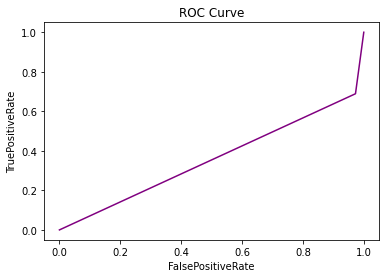

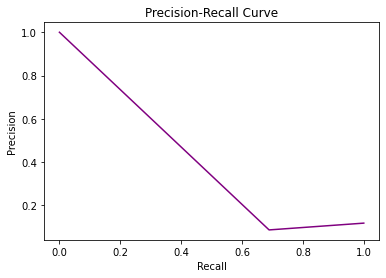

In [15]:
Test_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for Logistic Regression on Unbalanced dataset is ",Test_accuracy)

# Balanced Accuracy 
Balanced_Accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for Logistic Regression on Unbalanced dataset is ",Balanced_Accuracy)

#Recall/Sensitivity
Recall = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for Logistic Regression on Unbalanced dataset is ",Recall)

# F1 score
f1score = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for Logistic Regression on Unbalanced dataset is ",f1score)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')

ax.set_title('ROC Curve')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
# OverSampling

In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
#increasing minority class to half of majority class
smt = SMOTE(sampling_strategy = 0.5,random_state = 0)

In [19]:
X_over,Y_over = smt.fit_resample(X,Y)

In [20]:
print(Counter(Y_over))

Counter({2: 39922, 1: 19961})


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = LR.predict(x_test)

# Evaluation Metrics for Oversampled data

Accuracy for LogisticRegression on OverSampled dataset is  0.8196543374801704
Balanced Accuracy for LogisticRegression on OverSampled dataset is  0.781782506536842
Recall/Sensitivity for LogisticRegression on OverSampled dataset is  0.6680435598948554
f1_score for LogisticRegression on OverSampled dataset is  0.7118847539015607


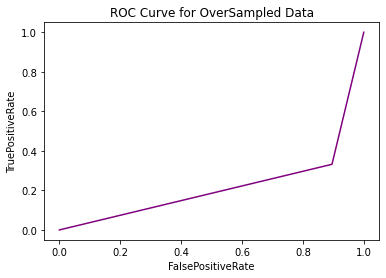

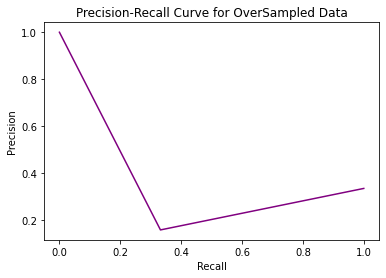

In [24]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on OverSampled dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on OverSampled dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on OverSampled dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on OverSampled dataset is ",f1score_over)

#ROC CURVE for OverSampled data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for OverSampled Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for OverSampled data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for OverSampled Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


# Cleaning Oversampled data with tomek-links


In [25]:
from imblearn.under_sampling import TomekLinks

In [26]:
tl = TomekLinks(sampling_strategy = 'not majority')
X_over_clean,Y_over_clean = tl.fit_resample(X_over,Y_over)

In [27]:
print(Counter(Y_over_clean))

Counter({2: 39922, 1: 19795})


In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_over_clean,Y_over_clean,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = LR.predict(x_test)

In [ ]:
#Evaluation Metrics for Oversampled and cleaned data set

Accuracy for LogisticRegression on OverSampled and Cleaned dataset is  0.8236697785406288
Balanced Accuracy for LogisticRegression on OverSampled and Cleaned dataset is  0.7842972759246308
Recall/Sensitivity for LogisticRegression on OverSampled and Cleaned dataset is  0.6667505980108271
f1_score for LogisticRegression on OverSampled and Cleaned dataset is  0.7154823020805188


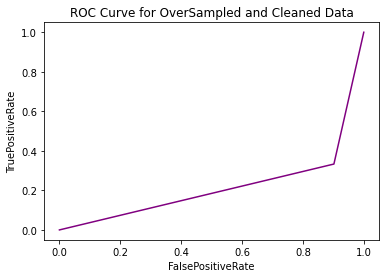

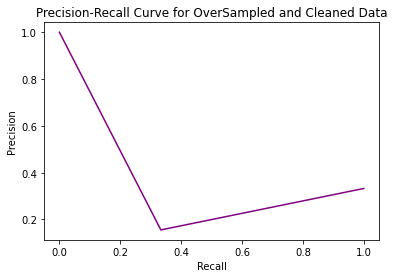

In [30]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on OverSampled and Cleaned dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on OverSampled and Cleaned dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on OverSampled and Cleaned dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on OverSampled and Cleaned dataset is ",f1score_over)

#ROC CURVE for OverSampled data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for OverSampled and Cleaned Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for OverSampled data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for OverSampled and Cleaned Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


# Undersampling Majority Class using random undersampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
randomUnderSample = RandomUnderSampler(sampling_strategy = 0.41 ,random_state = 0)

In [33]:
X_under,Y_under = randomUnderSample.fit_resample(X,Y)
print(Counter(Y_under))

Counter({2: 12900, 1: 5289})


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_under,Y_under,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = LR.predict(x_test)

In [ ]:
#Evaluation metrics for undersampled data

Accuracy for LogisticRegression on UnderSampled dataset is  0.8287520615722924
Balanced Accuracy for LogisticRegression on UnderSampled dataset is  0.7580806862035342
Recall/Sensitivity for LogisticRegression on UnderSampled dataset is  0.5964826575476306
f1_score for LogisticRegression on UnderSampled dataset is  0.6621475054229935


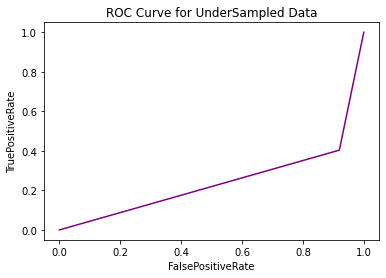

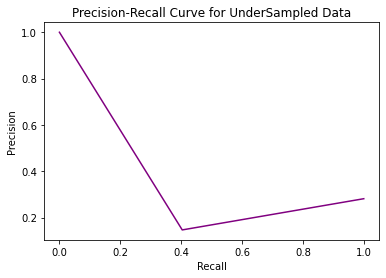

In [36]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on UnderSampled dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on UnderSampled dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on UnderSampled dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on UnderSampled dataset is ",f1score_over)

#ROC CURVE for UnderSampled data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for UnderSampled Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for UnderSampled data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for UnderSampled Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()


# Cleaning Undersampled data with tomek-links

In [37]:
t2 = TomekLinks(sampling_strategy = 'majority')
X_under_clean,Y_under_clean = t2.fit_resample(X_under,Y_under)#UnderSampling and Cleaning Majority class.
print(Counter(Y_under_clean))

Counter({2: 12060, 1: 5289})


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_under_clean,Y_under_clean,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = LR.predict(x_test)

In [ ]:
#Evaliuation metrics for underSampled and Cleaned dataset

Evaluation metrics for undersampled data
Accuracy for LogisticRegression on underSampled and Cleaned dataset is  0.842507204610951
Balanced Accuracy for LogisticRegression on underSampled and Cleaned  dataset is  0.7861839487505968
Recall/Sensitivity for LogisticRegression on underSampled and Cleaned dataset is  0.6475728155339806
f1_score for LogisticRegression on underSampled and Cleaned dataset is  0.7093858016484976


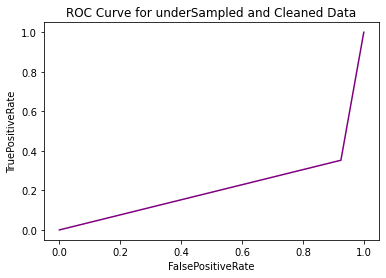

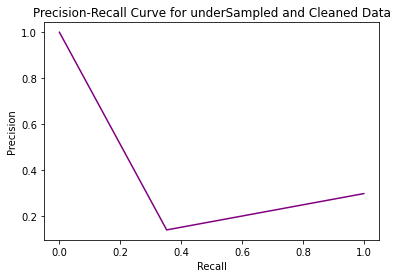

In [40]:
print("Evaluation metrics for undersampled data")
Test_accuracy_under_clean = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on underSampled and Cleaned dataset is ",Test_accuracy_under_clean)

# Balanced Accuracy 
Balanced_Accuracy_under_clean = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on underSampled and Cleaned  dataset is ",Balanced_Accuracy_under_clean)

#Recall/Sensitivity
Recall_under_clean = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on underSampled and Cleaned dataset is ",Recall_under_clean)

# F1 score
f1score_under_clean = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on underSampled and Cleaned dataset is ",f1score_under_clean)

#ROC CURVE for OverSampled data
fpr_under_clean, tpr_under_clean, thresholds_under_clean = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_under_clean, tpr_under_clean, color='purple')

ax.set_title('ROC Curve for underSampled and Cleaned Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()


#Precision-Recall Curve for OverSampled data
precision_under_clean, recall_under_clean, thresholds_under_clean = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_under_clean, precision_under_clean, color='purple')

ax.set_title('Precision-Recall Curve for underSampled and Cleaned Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Overall Balanced data

In [41]:
print(Counter(Y))
print(Counter(Y_over))
randomUnderSample_overall = RandomUnderSampler(sampling_strategy = 1 ,random_state = 0)
X_overall,Y_overall = randomUnderSample_overall.fit_resample(X_over,Y_over)
print(Counter(Y_overall))
x_train,x_test,y_train,y_test = train_test_split(X_overall,Y_overall,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

Counter({2: 39922, 1: 5289})
Counter({2: 39922, 1: 19961})
Counter({1: 19961, 2: 19961})


Accuracy for LogisticRegression on balanced dataset is  0.8308597908447617
Balanced Accuracy for LogisticRegression on balanced dataset is  0.8308625845339481
Recall/Sensitivity for LogisticRegression on balanced dataset is  0.8274308597171818
f1_score for LogisticRegression on balanced dataset is  0.830392464678179


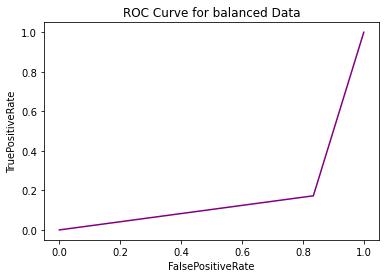

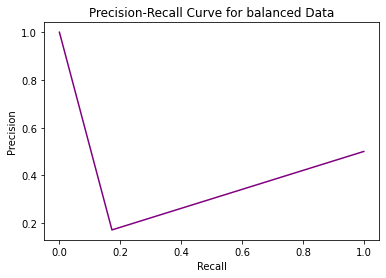

In [42]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on balanced dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on balanced dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on balanced dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on balanced dataset is ",f1score_over)

#ROC CURVE for balanced data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for balanced Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for balanced data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for balanced Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

# Overall Balanced data and cleaned

In [43]:
clean_balanced = TomekLinks(sampling_strategy='all')
X_balanced_clean,Y_balanced_clean = clean_balanced.fit_resample(X_overall,Y_overall)
print(Counter(Y_balanced_clean))

Counter({1: 19831, 2: 19831})


In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_balanced_clean,Y_balanced_clean,test_size = 0.4, random_state = 0)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [ ]:
#Evaluation metrics for Overall Balanced data and cleaned

Accuracy for LogisticRegression on balanced and Cleaned dataset is  0.8305074062401513
Balanced Accuracy for LogisticRegression on balanced and Cleaned dataset is  0.8304891703240868
Recall/Sensitivity for LogisticRegression on balanced and Cleaned dataset is  0.823432760364004
f1_score for LogisticRegression on balanced and Cleaned dataset is  0.8289331382403461


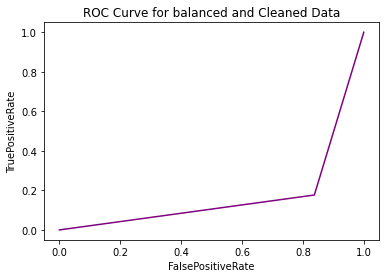

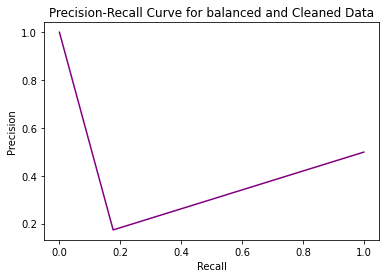

In [45]:
Test_accuracy_over = accuracy_score(y_test,y_pred)
print("Accuracy for LogisticRegression on balanced and Cleaned dataset is ",Test_accuracy_over)

# Balanced Accuracy 
Balanced_Accuracy_over = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy for LogisticRegression on balanced and Cleaned dataset is ",Balanced_Accuracy_over)

#Recall/Sensitivity
Recall_over = recall_score(y_test,y_pred,pos_label = 1)
print("Recall/Sensitivity for LogisticRegression on balanced and Cleaned dataset is ",Recall_over)

# F1 score
f1score_over = f1_score(y_test,y_pred,pos_label = 1)
print("f1_score for LogisticRegression on balanced and Cleaned dataset is ",f1score_over)

#ROC CURVE for balanced and Cleaned data
fpr_over, tpr_over, thresholds_over = roc_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(fpr_over, tpr_over, color='purple')

ax.set_title('ROC Curve for balanced and Cleaned Data')
ax.set_ylabel('TruePositiveRate')
ax.set_xlabel('FalsePositiveRate')
plt.show()

#Precision-Recall Curve for balanced and Cleaned data
precision_over, recall_over, thresholds_over = precision_recall_curve(y_test,y_pred,pos_label = 1)
#ploting roc curve
fig, ax = plt.subplots()
ax.plot(recall_over, precision_over, color='purple')

ax.set_title('Precision-Recall Curve for balanced and Cleaned Data')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
#Serializing the model using sklearn pickel

In [46]:
import pickle

In [48]:
pickle.dump(LR,open('logisticRegression.pkl','wb'))

In [49]:
pickeled_LR=pickle.load(open('logisticRegression.pkl','rb'))

In [51]:
print(pickeled_LR.predict([[31,1,2,3,2,54,1,2,1,18,1,239,6,-1,0,0]]))

[1]
